## Introduction to the Data Set

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('train.csv')

In [6]:
features = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

titanic = titanic[features]
titanic.dropna(inplace=True)

In [8]:
titanic.info()
titanic.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 70.1+ KB


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Creating Histograms In Seaborn

Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it.

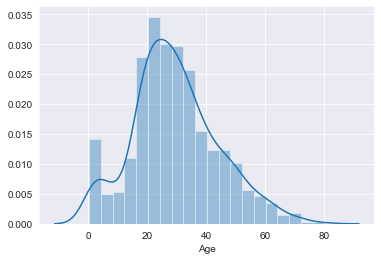

In [14]:
sns.distplot(titanic['Age'])
plt.show()


## Generating A Kernel Density Plot

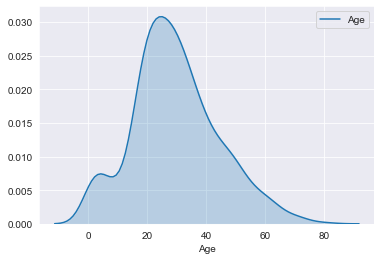

In [16]:
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')
plt.show()

## Modifying The Appearance Of The Plots

![Jupyter](./seaborn_all_styles.png)

By default, the seaborn style is set to "darkgrid"

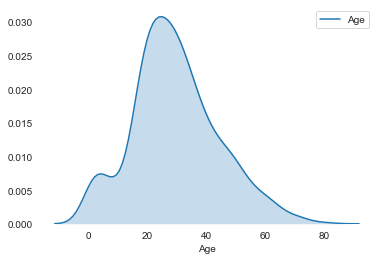

In [18]:
sns.set_style('white')

sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')

sns.despine(left=True, bottom=True)
plt.show()

## Conditional Distributions Using A Single Condition

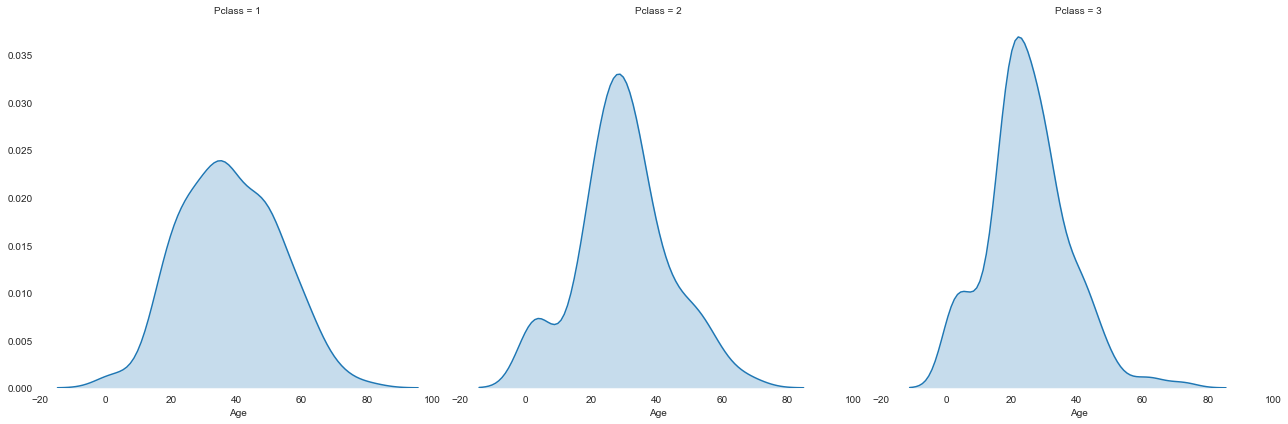

In [22]:
g = sns.FacetGrid(titanic, col="Pclass", height=6)
g.map(sns.kdeplot, "Age", shade=True)

sns.despine(left=True, bottom=True)
plt.show()

Seaborn handled:

* subsetting the data into rows where `Pclass` is `1`, where `Pclass` is `2` and where `Pclass` is `3`
* creating both Axes objects, ensuring the same axis scales
* plotting both kernel density plots
* Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The `seaborn.FacetGrid` object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from FacetGrid is another word for "subset". Setting the `col` parameter to `"Pclass"` specifies a separate plot for each unique value in the `Pclass` column. Setting the size parameter to 6 specifies a height of 6 inches for each plot.

Once we've created the grid, we use the `FacetGrid.map()` method to specify the plot we want for each unique value of Pclass. Seaborn generated one kernel density plot for the ages of passengers that belongs to Pclass and one kernel density plot for the ages of passengers that didn't belong to Pclass.

The function that's passed into `FacetGrid.map()` has to be a valid matplotlib or seaborn function. 

## Creating Conditional Plots Using Two Conditions

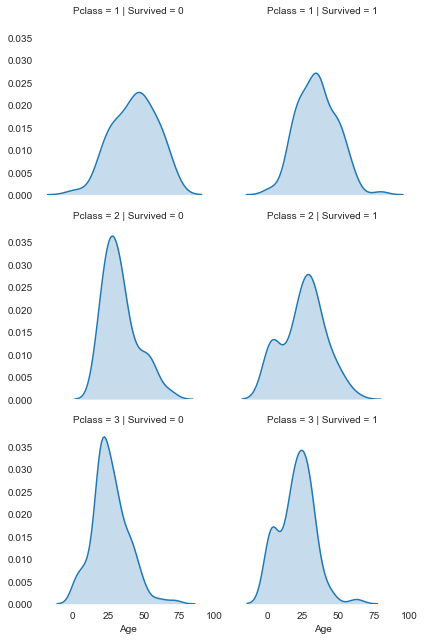

In [23]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

## Creating Conditional Plots Using Three Conditions

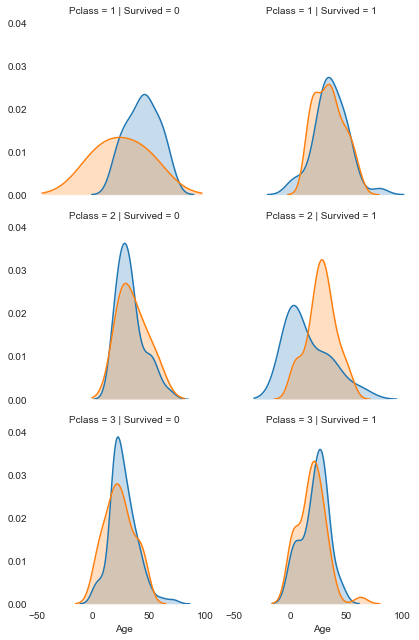

In [25]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

## Adding A Legend

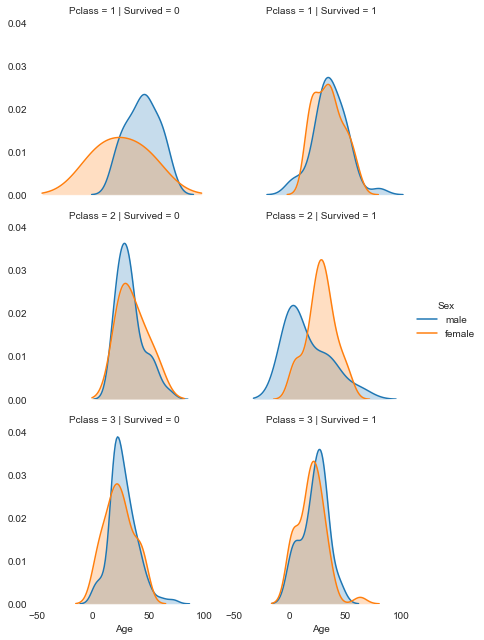

In [29]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex")
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(left=True, bottom=True)
plt.show()